# 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

## 2.1 Data Preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data 

--2025-10-01 08:03:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  5.06MB/s    in 0.3s    

2025-10-01 08:03:58 (5.06 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
string_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [6]:
for col in string_cols:
    df[col]= df[col].str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.2 Exploratory Data Analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

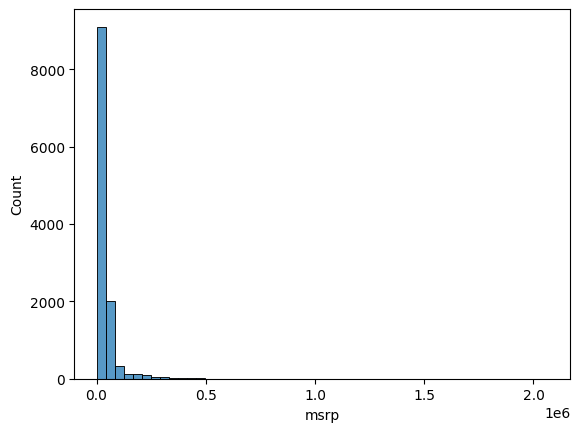

In [10]:
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

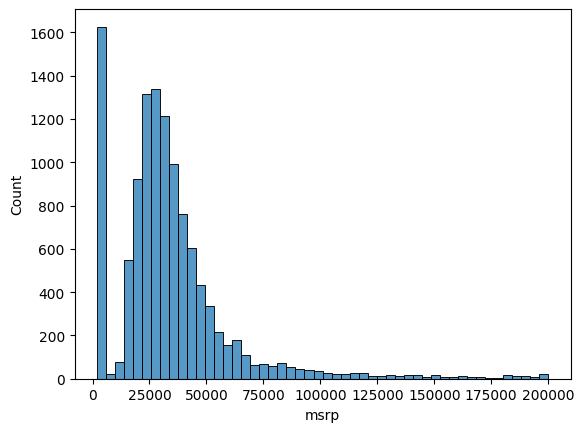

In [11]:
sns.histplot(df.msrp[df.msrp < 200000], bins = 50)

In [12]:
np.log1p([0,1,10,1000,1000000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 13.81551156])

In [13]:
np.log([0+1,1+1,10+1,1000+1,1000000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 13.81551156])

In [14]:
# Logarithmic transformation is applied to reduce long tail distribution and bring it closer to normal distribution as model behaves better in normal
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

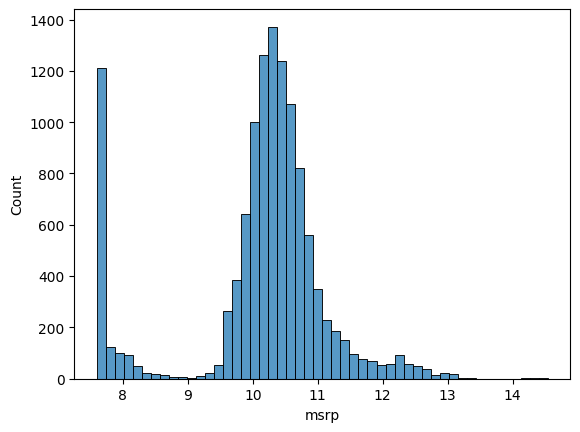

In [15]:
sns.histplot(price_logs, bins = 50)

Missing Values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.3 Setting up the validation framework

In [17]:
# Record split

n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

n,n_train+n_test+n_val

(11914, 11914)

In [18]:
#List of total numbers of rows
idx = np.arange(n)

#create a shuffle order
np.random.seed(2)
np.random.shuffle(idx)

In [19]:
# Dataset split using the shuffled order

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [20]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [21]:
# Reset index 

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
# Separate the y variable and add log transformation to remove long tail

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [23]:
# Remove target variable from the feature matrix (X)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [24]:
len(y_train),len(y_val),len(y_test)

(7150, 2382, 2382)

## 2.4 Linear Regression

In [25]:
# Simple implementation
w0 = 7.1
def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [26]:
xi = [512, 21, 11]
np.expm1(linear_regression(xi))

np.float64(480219.1867024801)

## 2.5 Linear Regression in vector form

In [27]:
X = np.array([[1,148,24,1385],[1,132,25,2031],[1,453,11,86]])

## 2.6 Training a Linear Regression

In [28]:
def train_linear_regression (X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0,w

In [29]:
X = np.array([
        [148,24,1385],
        [132,25,2031],
        [453,11,86],
        [158,24,185],
        [172,25,201],
        [433,11,867],
        [38,24,185],
        [12,25,201],
        [45,11,856]
] )

In [30]:
y = [100,20,300,40,506,123,21,345,12]

In [31]:
train_linear_regression (X,y)

(np.float64(-50.8358052513616), array([ 0.46541909, 10.88310303, -0.12921762]))

## 2.7 Car price base line model

In [32]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [33]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [34]:
X_train = df_train[base].values

In [35]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [36]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [37]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [38]:
X_train = df_train[base].fillna(0).values

In [39]:
w0, w = train_linear_regression(X_train,y_train)

In [40]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

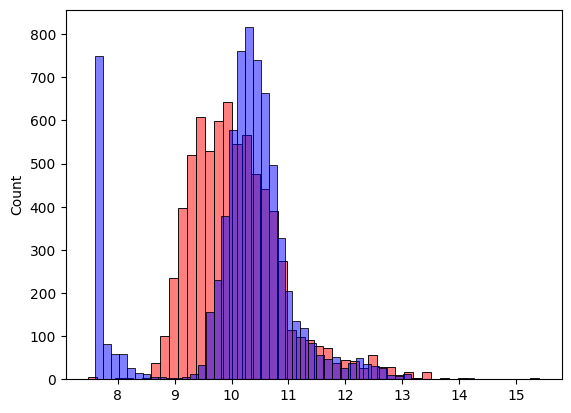

In [41]:
sns.histplot(y_pred, color = 'red', alpha = 0.5,  bins = 50)
sns.histplot(y_train, color = 'blue',alpha = 0.5, bins = 50)

## 2.8 RMSE

In [42]:
def rmse (y, y_pred):
    se = (y_pred - y) **2
    mse = se.mean()
    return np.sqrt(mse)

In [43]:
rmse(y_train,y_pred)

np.float64(0.7554192603920132)

## 2.9 Validating the model

In [44]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [45]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [46]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred,y_val)

np.float64(0.761653099130156)

## 2.10 Simple Feature Engineering

In [59]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']

    features = base + ['age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [62]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred,y_val)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

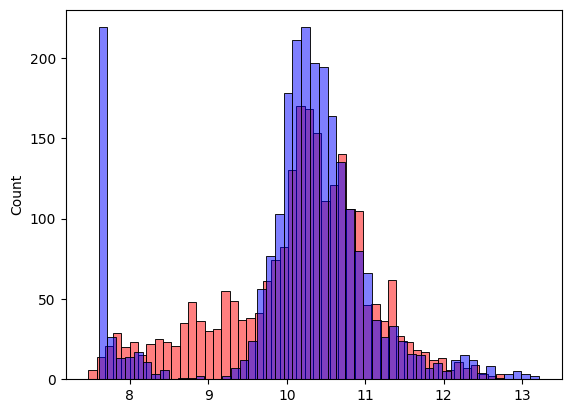

In [64]:
sns.histplot(y_pred, color = 'red', alpha = 0.5,  bins = 50)
sns.histplot(y_val, color = 'blue',alpha = 0.5, bins = 50)

## 2.11 Categorical variables

In [ ]:
for v in [2,3,4]:
    df_train['num_of_doors_%s' %v] = (df_train.number_of_doors == v).astype(int)

In [70]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_of_doors_%s' %v)

    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred,y_val)

np.float64(0.515799564150169)

In [82]:
make_list = list(df.make.value_counts().head(10).index)

In [84]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_of_doors_%s' %v)

    for v in make_list:
        df['make_%s' %v] = (df.make == v).astype(int)
        features.append('make_%s' %v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred,y_val)

np.float64(0.5008499503021595)

In [86]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [87]:
#model is ignored because there are too many types
categorical_variables = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style']

In [106]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(5).index)

In [107]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_of_doors_%s' %v)

    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [108]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_pred,y_val)

np.float64(23.019020704791835)

In [109]:
w0

np.float64(4011091003551887.0)